In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from collections import Counter
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [6]:
df = pd.read_csv(
    '/Users/scottlichtenstein/Desktop/IE/Term 3/Capstone/capstone.airbus/Notebooks/generated_data/scaled_dataset_with_fuel_leak_test.csv'
)


In [7]:
df.leakage.value_counts()

0    247436
1     61934
2     61610
3     61290
Name: leakage, dtype: int64

In [8]:
df

,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,...,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT,TOTAL_FUEL_USED,VALUE_FOB_DIFF,TOTAL_FOB_BY_QTY,DELTA_VFOB_VS_VFOBQTY,ALTITUDE_DIFF,VALUE_FOB_MISSING,leakage
0,-0.000015,-0.000015,-0.000015,-0.000015,-0.000048,0.000013,0.0,0.000067,0.000069,0.000070,...,0.000007,0.000006,-0.000726,-0.000015,-9.041711e-07,0.000013,0.000002,-4.784783e-07,-0.000003,0
1,0.001045,0.001094,0.001179,0.001043,-0.000046,0.000013,0.0,0.000067,0.000069,0.000070,...,0.000007,0.000006,-0.000726,0.001116,3.908452e-01,0.000013,0.000002,-1.063828e-03,-0.000003,0
2,0.001041,0.001086,0.001081,0.001064,-0.000032,-0.001947,0.0,0.000067,0.000069,0.000070,...,0.000007,0.000006,-0.000726,0.001094,-3.908470e-01,0.000013,-0.837354,3.481469e-03,0.042372,0
3,0.001044,0.001088,0.001077,0.001070,-0.000431,0.000013,0.0,0.000067,-0.068767,0.000070,...,-0.004485,0.004499,-0.000726,0.001096,3.908452e-01,-0.001947,0.837358,9.572180e-02,-0.000003,0
4,0.001039,0.001093,0.001077,0.001072,-0.000055,-0.005867,0.0,-0.083058,0.000069,0.000070,...,0.000007,0.000006,-0.000726,0.001096,-1.172539e+00,-0.001947,-1.674709,-9.807880e-02,0.127123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432265,0.003116,0.003242,0.002834,0.003140,0.001550,0.001973,0.0,-0.083058,0.000069,0.000070,...,-0.004485,0.004499,-0.000726,0.003158,7.816912e-01,0.000013,0.837358,-4.784783e-07,-0.042378,1
432266,0.006247,0.006840,0.007266,0.006664,-0.002445,-0.005867,0.0,-0.083058,-0.068767,0.000070,...,-0.004485,0.004499,-0.000726,0.006915,-7.816930e-01,-0.001947,-1.674709,-2.085003e-01,0.127123,1
432267,0.003505,0.003212,0.003217,0.003141,-0.000048,-0.001947,0.0,0.000067,-0.068767,0.000070,...,0.000007,-0.004488,-0.000726,0.003349,-9.041711e-07,-0.001947,0.000002,-2.085003e-01,0.042372,1
432268,0.003116,0.003195,0.003629,0.003523,0.001550,-0.003907,0.0,0.000067,0.000069,-0.066595,...,-0.004485,0.000006,-0.000726,0.003448,-3.908470e-01,-0.003907,0.000002,4.169992e-01,0.084748,1


In [11]:
#new column Label with only 0 and 1
df["Label"] = np.where(df['leakage'] == 0, 0, 1)

# Visualization of Anomalies

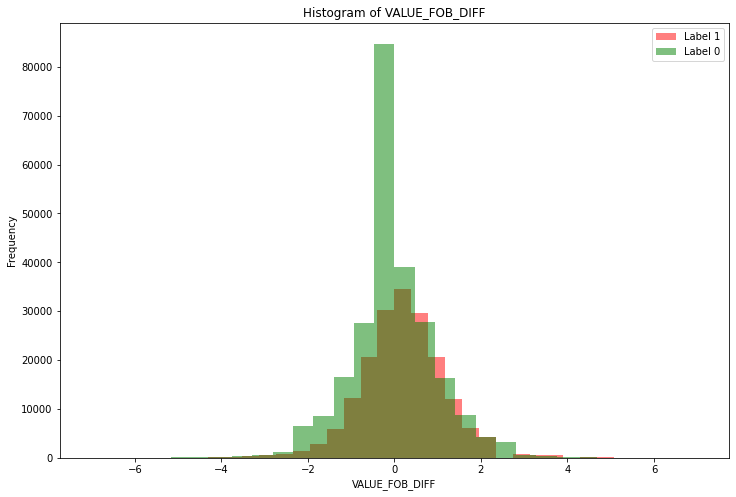

In [19]:
# Selecting the data for the histogram
data_1 = df[df['Label']==1]['VALUE_FOB_DIFF']
data_0 = df[df['Label']==0]['VALUE_FOB_DIFF']

# Plotting the histograms
plt.figure(figsize=(12, 8))
plt.hist(data_1, bins=30, alpha=0.5, color='red', label='Label 1')
plt.hist(data_0, bins=30, alpha=0.5, color='green', label='Label 0')
plt.title('Histogram of VALUE_FOB_DIFF')
plt.xlabel('VALUE_FOB_DIFF')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


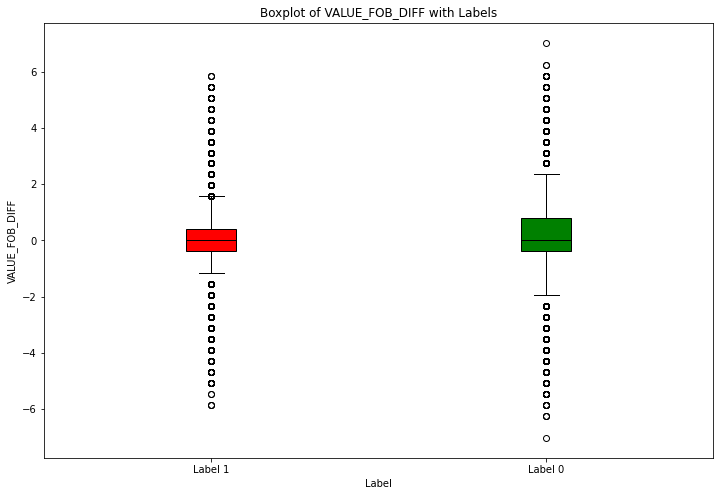

In [42]:
# Selecting the data for the boxplot
data_1 = df[df['leakage'] == 1]['VALUE_FOB_DIFF']
data_0 = df[df['leakage'] == 0]['VALUE_FOB_DIFF']

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a boxplot with colored data points
boxprops = dict(facecolor='white', color='black')
whiskerprops = dict(color='black')
flierprops = dict(marker='o', markerfacecolor='none', markersize=6)
medianprops = dict(color='black')
capprops = dict(color='black')

ax.boxplot([data_1, data_0],
           labels=['Label 1', 'Label 0'],
           patch_artist=True,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           flierprops=flierprops,
           medianprops=medianprops,
           capprops=capprops)

# Setting the box colors
box_colors = ['red', 'green']
for patch, color in zip(ax.artists, box_colors):
    patch.set_facecolor(color)

# Setting the title and labels
ax.set_title('Boxplot of VALUE_FOB_DIFF with Labels')
ax.set_xlabel('Label')
ax.set_ylabel('VALUE_FOB_DIFF')

# Displaying the plot
plt.show()


# Z-Statistic algorithm 

In [20]:
#new dataframe with only required columns
dfx = df[["VALUE_FOB_DIFF", "leakage"]]
dfx.sample(10)


,VALUE_FOB_DIFF,leakage
151164,-7.816930e-01,0
264691,-3.908470e-01,3
154284,-9.041711e-07,0
62919,-1.172539e+00,0
212408,-3.908470e-01,0
77217,-1.563385e+00,0
41470,7.816912e-01,0
40559,-3.908470e-01,0
304553,3.908452e-01,3
119359,7.816912e-01,0


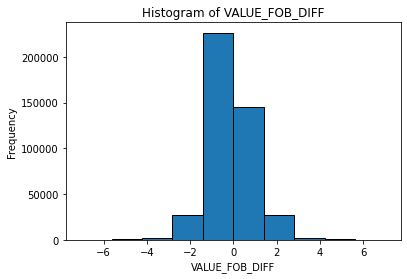

In [21]:
#Check for normality 
dfx['VALUE_FOB_DIFF'].plot(kind='hist', edgecolor='black')
plt.title('Histogram of VALUE_FOB_DIFF')
plt.xlabel('VALUE_FOB_DIFF')
plt.show()


In [22]:
#new column Label with only 0 and 1
dfx["Label"] = np.where(dfx['leakage'] == 0, 0, 1)

/var/folders/4n/swp60yyd37qg_dmlq1v1_6jw0000gn/T/ipykernel_69231/1684253527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["Label"] = np.where(dfx['leakage'] == 0, 0, 1)


In [23]:
#Checking balance
dfx.Label.value_counts()

0    247436
1    184834
Name: Label, dtype: int64

In [24]:
dfx.sample(10)

,VALUE_FOB_DIFF,leakage,Label
260404,3.908452e-01,3,1
358956,-1.172539e+00,2,1
381001,-3.908470e-01,1,1
100272,3.908452e-01,0,0
14287,-9.041711e-07,0,0
394907,-9.041711e-07,1,1
407044,-7.816930e-01,1,1
37799,-7.816930e-01,0,0
363949,-7.816930e-01,2,1
322716,-9.041711e-07,2,1


In [27]:
#Z statistic
X_train, X_test, y_train, y_test = train_test_split(dfx['VALUE_FOB_DIFF'],
                                                    dfx['Label'],
                                                    test_size=0.2,
                                                    random_state=42)

#  Calculate the z-scores for the training set
mean = X_train.mean()
std = X_train.std()
X_train['z_score'] = np.abs((X_train - mean) / std)

# Determine the threshold for the z-value
threshold = 0.8 # Set the threshold value for the z-score

# Classify anomalies for the training set based on the threshold
X_train['anomaly'] = np.where(X_train['z_score'] > threshold, 1, 0)

# Evaluate the performance of the algorithm on the training set
y_train_pred = X_train['anomaly']
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Performance on the training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

# Apply the algorithm to the test set
X_test['z_score'] = np.abs((X_test- mean) / std)
X_test['anomaly'] = np.where(X_test['z_score'] > threshold, 1, 0)

#  Evaluate the performance on the test set
y_test_pred = X_test['anomaly']
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nPerformance on the test set:")

print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Performance on the training set:
Accuracy: 0.5278038031785689
Precision: 0.41832838353839624
Recall: 0.2666792884044546
F1 Score: 0.3257175655419886

Performance on the test set:
Accuracy: 0.5279454970273209
Precision: 0.41710932145305
Recall: 0.26358246934300644
F1 Score: 0.32303226341544333


In [13]:
# Initialize the best threshold and the best score
best_threshold = None
best_score = -np.inf

# Iterate over a range of possible threshold values
for threshold in np.linspace(start=0, stop=5, num=100):
    print( threshold)
    # Classify anomalies for the training set based on the threshold
    X_train['anomaly'] = np.where(X_train['z_score'] > threshold, 1, 0)
    y_train_pred = X_train['anomaly']
    
    print(y_train_pred.value_counts())


    # Calculate the score
    score = f1_score(y_train, y_train_pred)
    print(score)
    print()

    # If this threshold gives a better score, update the best threshold and the best score
    if score > best_score:
        best_threshold = threshold
        best_score = score

print('Best threshold:', best_threshold)
print('Best F1 Score:', best_score)


0.0
1    345816
Name: anomaly, dtype: int64
0.5991100020457395

0.050505050505050504
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.10101010101010101
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.15151515151515152
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.20202020202020202
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.25252525252525254
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.30303030303030304
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.35353535353535354
1    281903
0     63913
Name: anomaly, dtype: int64
0.5594607674338523

0.40404040404040403
0    174334
1    171482
Name: anomaly, dtype: int64
0.45341682974559694

0.45454545454545453
0    174334
1    171482
Name: anomaly, dtype: int64
0.45341682974559694

0.5050505050505051
0    174334
1    171482
Name: anomaly, dtype: int64
0.45341682974559694

0.55555555555

### Hypothesis Why Z-score does not work

In [28]:
df_not_scaled = pd.read_csv(
    '/Users/scottlichtenstein/Desktop/IE/Term 3/Capstone/capstone.airbus/Notebooks/generated_data/merged_dataset_with_fuel_leak_diff_test.csv'
)


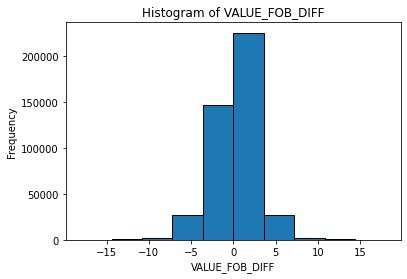

In [29]:
#Check distribution
df_not_scaled['VALUE_FOB_DIFF'].plot(kind='hist', edgecolor='black')
plt.title('Histogram of VALUE_FOB_DIFF')
plt.xlabel('VALUE_FOB_DIFF')
plt.show()


# Supervised Algorithm 

In [34]:
# Define the models
models = [
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=1000)
]

model_names = [
    "XGBClassifier", "RandomForestClassifier", "AdaBoostClassifier",
    "GradientBoostingClassifier", "DecisionTreeClassifier",
    "LogisticRegression"
]

# Select features and target
features = df.select_dtypes(include=[np.number]).drop(
    columns=['Label', 'leakage'])
target = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(
    columns=['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "AUC": auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results


Training XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training RandomForestClassifier...
Training AdaBoostClassifier...
Training GradientBoostingClassifier...
Training DecisionTreeClassifier...
Training LogisticRegression...


,Model,AUC,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.783665,0.706191,0.699758,0.699378,0.699560
1,RandomForestClassifier,0.745238,0.769854,0.768920,0.774679,0.768392
2,AdaBoostClassifier,0.633850,0.603743,0.590562,0.566888,0.553355
3,GradientBoostingClassifier,0.664207,0.611921,0.604221,0.572189,0.555442
4,DecisionTreeClassifier,0.691855,0.676337,0.675576,0.679349,0.674351
5,LogisticRegression,0.498048,0.572698,0.286352,0.499990,0.364150


In [20]:
test_data = pd.concat([X_test, y_test], axis=1)

In [21]:
test_data_0 = test_data[test_data['Label'] == 0]
test_data_1 = test_data[test_data['Label'] == 1]

# Randomly sample from each dataframe
test_data_0 = test_data_0.sample(n=40000, random_state=1)
test_data_1 = test_data_1.sample(n=10000, random_state=1)

# Concatenate the two samples to get your final sample
df_sample_test = pd.concat([test_data_0, test_data_1])

In [22]:
df_sample_test.Label.value_counts()

0    40000
1    10000
Name: Label, dtype: int64

In [23]:
X_df_sample_test = df_sample_test.drop('Label', axis=1)
y_df_sample_test = df_sample_test['Label']

In [24]:
#############NEW TEST

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(
    columns=['Model','AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_df_sample_test)
    y_pred_proba = model.predict_proba(X_df_sample_test)[:, 1]

    auc = roc_auc_score(y_df_sample_test, y_pred_proba)
    report = classification_report(y_df_sample_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "AUC": auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results

Training XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training RandomForestClassifier...
Training AdaBoostClassifier...
Training GradientBoostingClassifier...
Training DecisionTreeClassifier...
Training LogisticRegression...


,Model,AUC,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.782814,0.72700,0.643440,0.699588,0.651504
1,RandomForestClassifier,0.742043,0.75372,0.688096,0.773775,0.697585
2,AdaBoostClassifier,0.633324,0.71802,0.564833,0.566700,0.565701
3,GradientBoostingClassifier,0.663500,0.73614,0.577748,0.573075,0.575113
4,DecisionTreeClassifier,0.687400,0.66344,0.616108,0.676250,0.605086
5,LogisticRegression,0.499212,0.79998,0.399998,0.499987,0.444438


In [35]:
#crossvalidated Test

# Prepare an empty DataFrame to store the results
results = pd.DataFrame(columns=[
    'Model', 'CV Mean AUC', 'CV Std AUC', 'Accuracy', 'Precision', 'Recall',
    'F1 Score'
])

# Iterate over models, train, make predictions and get classification metrics
for model, name in zip(models, model_names):
    print(f"Training and performing cross-validation on {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Perform cross-validation and get AUC scores
    cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    results = results.append(
        {
            "Model": name,
            "CV Mean AUC": cv_auc.mean(),
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        },
        ignore_index=True)

# Display the results
results



Training and performing cross-validation on XGBClassifier...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training and performing cross-validation on RandomForestClassifier...
Training and performing cross-validation on AdaBoostClassifier...
Training and performing cross-validation on GradientBoostingClassifier...
Training and performing cross-validation on DecisionTreeClassifier...
Training and performing cross-validation on LogisticRegression...


,Model,CV Mean AUC,CV Std AUC,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.783968,NaN,0.706191,0.699758,0.699378,0.699560
1,RandomForestClassifier,0.732649,NaN,0.770896,0.770086,0.775883,0.769474
2,AdaBoostClassifier,0.628934,NaN,0.603743,0.590562,0.566888,0.553355
3,GradientBoostingClassifier,0.659422,NaN,0.611921,0.604221,0.572189,0.555442
4,DecisionTreeClassifier,0.687568,NaN,0.675990,0.675287,0.679056,0.674024
5,LogisticRegression,0.497078,NaN,0.572698,0.286352,0.499990,0.364150


In [37]:
# Define the parameter grids for each model
# For Random Forest
rf_param_grid = {
    'n_estimators': [100],  # lower number of trees
    'max_depth': [5],  # lower depth
    'min_samples_split': [2, 5, 10]  # not affecting speed that much
}

# For XGBoost
xgb_param_grid = {
    'n_estimators': [100],  # lower number of gradient boosted trees
    'max_depth': [3],  # lower depth
    'learning_rate': [0.1,0.01,0.001]  # higher learning rate, but still reasonable to avoid underfitting
}


# Create the models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform grid search for each model
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='roc_auc')

# Train and perform cross-validation with grid search for Random Forest
print("Training and performing cross-validation on Random Forest...")
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_cv_auc = rf_grid_search.best_score_

# Train and perform cross-validation with grid search for XGBoost
print("Training and performing cross-validation on XGBoost...")
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_cv_auc = xgb_grid_search.best_score_

# Evaluate the best models on the test set
rf_best_model.fit(X_train, y_train)
rf_y_pred = rf_best_model.predict(X_test)
rf_y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]

xgb_best_model.fit(X_train, y_train)
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_y_pred_proba = xgb_best_model.predict_proba(X_test)[:, 1]

# Calculate classification metrics for the best models
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
rf_accuracy = rf_report["accuracy"]
rf_precision = rf_report["macro avg"]["precision"]
rf_recall = rf_report["macro avg"]["recall"]
rf_f1 = rf_report["macro avg"]["f1-score"]

xgb_report = classification_report(y_test, xgb_y_pred, output_dict=True)
xgb_accuracy = xgb_report["accuracy"]
xgb_precision = xgb_report["macro avg"]["precision"]
xgb_recall = xgb_report["macro avg"]["recall"]
xgb_f1 = xgb_report["macro avg"]["f1-score"]

# Append the results to the DataFrame
results = results.append(
    {
        "Model": "Random Forest (Grid Search)",
        "AUC": rf_cv_auc,
        "Accuracy": rf_accuracy,
        "Precision": rf_precision,
        "Recall": rf_recall,
        "F1 Score": rf_f1
    },
    ignore_index=True)

results = results.append(
    {
        "Model": "XGBoost (Grid Search)",
        "AUC": xgb_cv_auc,
        "Accuracy": xgb_accuracy,
        "Precision": xgb_precision,
        "Recall": xgb_recall,
        "F1 Score": xgb_f1
    },
    ignore_index= True)


Training and performing cross-validation on Random Forest...
Training and performing cross-validation on XGBoost...


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/scottlichtenstein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
results

,Model,CV Mean AUC,CV Std AUC,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBClassifier,0.783968,NaN,0.706191,0.699758,0.699378,0.699560,NaN
1,RandomForestClassifier,0.732649,NaN,0.770896,0.770086,0.775883,0.769474,NaN
2,AdaBoostClassifier,0.628934,NaN,0.603743,0.590562,0.566888,0.553355,NaN
3,GradientBoostingClassifier,0.659422,NaN,0.611921,0.604221,0.572189,0.555442,NaN
4,DecisionTreeClassifier,0.687568,NaN,0.675990,0.675287,0.679056,0.674024,NaN
5,LogisticRegression,0.497078,NaN,0.572698,0.286352,0.499990,0.364150,NaN
6,Random Forest (Grid Search),NaN,NaN,0.588001,0.599699,0.525654,0.446826,0.626534
7,XGBoost (Grid Search),NaN,NaN,0.615298,0.605452,0.580324,0.569896,0.661160
